In [340]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

import warnings
from warnings import filterwarnings
filterwarnings ('ignore')

In [342]:
# read dataset

df = pd.read_csv('/Users/simarmalhan/Downloads/Automobile_data.csv')

In [344]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [346]:
# dataset overview

df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [350]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [352]:
df.replace('?', np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [354]:
print(df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [356]:
df[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [358]:
df[(df['body-style'] == 'sedan') & ((df['make'] == 'mazda') | (df['make'] == 'dodge'))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
26,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
60,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
65,0,118,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344


We see that for cars made by dodge and mazdam when the body type is sedan the number of doors are four. Therefore, we will replace the missing values by 4.

In [361]:
df['num-of-doors'].replace('np.nan', 'four', inplace = True)

In [363]:
# horsepower

df[df['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [365]:
for col in ['compression-ratio', 'stroke', 'bore']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[((df['compression-ratio'] > 8.5) & (df['compression-ratio'] < 8.9)) &
((df['stroke'] > 3.7) & (df['stroke'] < 4)) &
((df['bore'] > 3.44) & (df['bore'] < 3.47))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [367]:
df['normalized-losses'].dtype

dtype('O')

In [369]:
df['normalized-losses'] = df['normalized-losses'].astype('Int64')

In [371]:
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())

In [373]:
df['normalized-losses'].isna().sum()

0

In [375]:
df['horsepower'] = df['horsepower'].astype(float)

In [377]:
df['horsepower'] = df['horsepower'].fillna(mean_hp)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    Int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [381]:
df[df['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500,16,22,NaN
44,1,122,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400,38,43,NaN
45,0,122,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400,38,43,NaN
129,1,122,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750,17,28,NaN


In [383]:
df['price'].dtype

dtype('O')

In [385]:
df['price'] = df['price'].astype('float')

In [387]:
priceofhatchbackandsedan = df.loc[(df['body-style'] == 'hatchback') | (df['body-style'] == 'sedan'), 'price']
priceofhatchbackandsedan.mean()

12569.895061728395

In [389]:
df['price'] = df['price'].fillna(priceofhatchbackandsedan.mean())

In [391]:
df['num-of-doors'] = df['num-of-doors'].fillna('four')

In [393]:
df[df['stroke'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000,17,23,10945.0
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000,17,23,11845.0
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000,17,23,13645.0
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000,16,23,15645.0


In [395]:
df['wheel-base'].dtype

dtype('float64')

In [397]:
strokenafilling = df.loc[(df['body-style'] == 'hatchback') & ((df['wheel-base'] > 95.0) | (df['wheel-base'] < 96.0)), 'stroke']
strokenafilling.mean()

3.2795454545454543

In [399]:
df['stroke'].dtype

dtype('float64')

In [401]:
df['stroke'] = df['stroke'].fillna(strokenafilling.mean())

In [403]:
borenafilling = df.loc[(df['body-style'] == 'hatchback') & ((df['wheel-base'] > 95.0) | (df['wheel-base'] < 96.0)), 'bore']
borenafilling.mean()

3.23939393939394

In [405]:
df['bore'] = df['bore'].fillna(borenafilling.mean())

In [407]:
df[df['peak-rpm'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,100.408602,NaN,23,31,9295.0
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,100.408602,NaN,23,31,9895.0


In [409]:
df = df.dropna(subset=['peak-rpm'])
df['peak-rpm'] = df['peak-rpm'].astype(int)

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    Int64  
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13  curb-weight        203 non-null    int64  
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    object 
 16  engine-size        203 non-null

<Axes: xlabel='horsepower', ylabel='engine-size'>

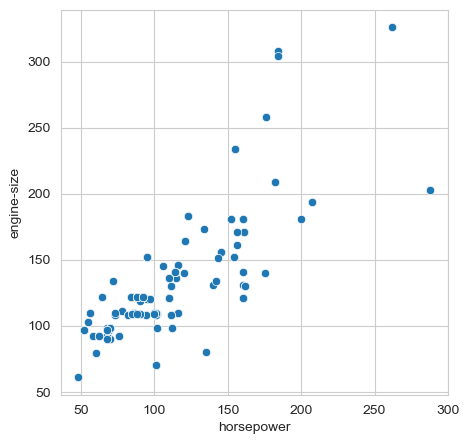

In [413]:
# scatterplot to check correlation between engine size and horsepower

plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'horsepower', y = 'engine-size', data = df, palette = 'bright')

<Axes: xlabel='aspiration', ylabel='horsepower'>

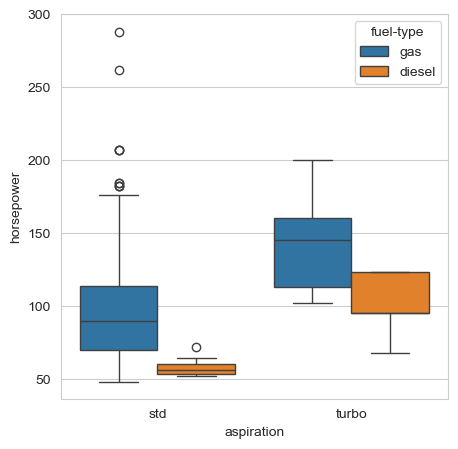

In [415]:
# boxplot to see the relationship between horsepower and aspiration

plt.figure(figsize = (5, 5))
sns.boxplot(data = df, x = 'aspiration', y = 'horsepower', hue = 'fuel-type')

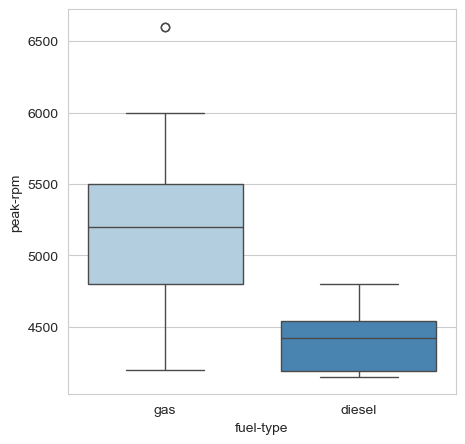

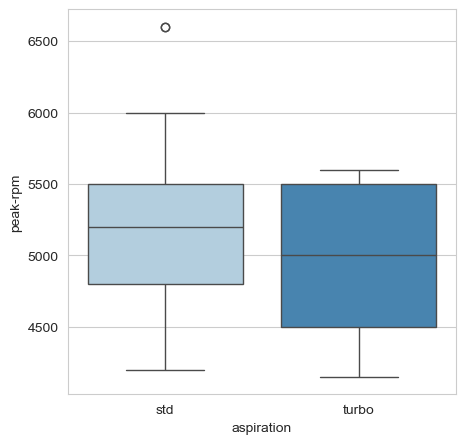

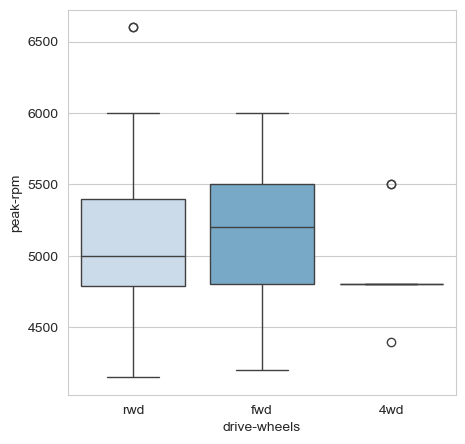

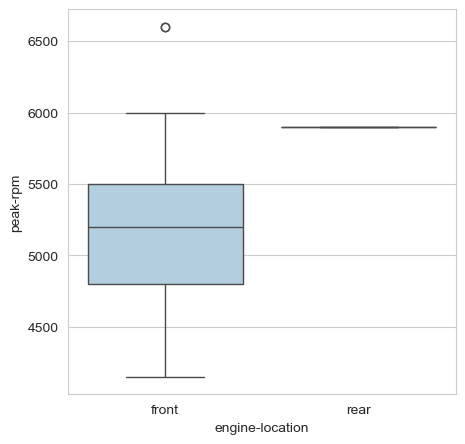

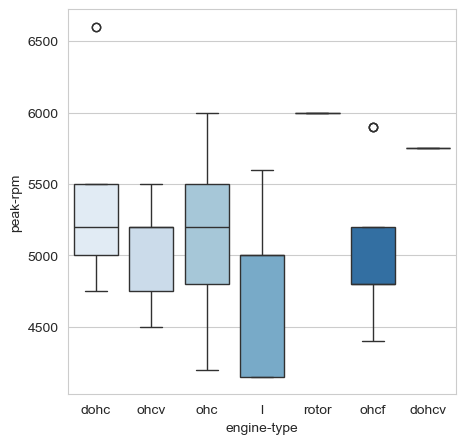

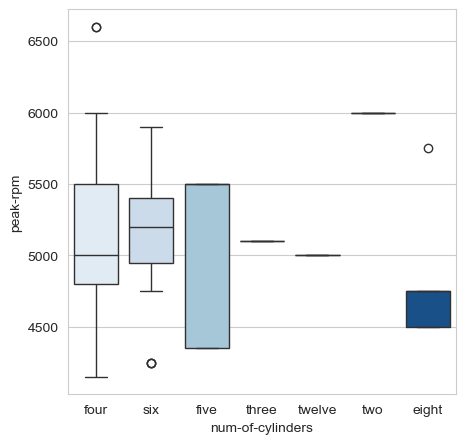

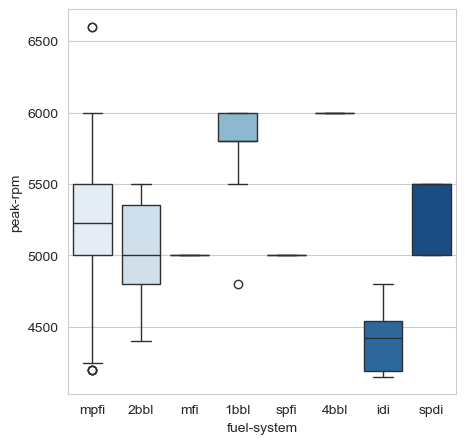

In [417]:
# boxplot to see the relationship between peak-rpm and aspiration

features = ['fuel-type', 'aspiration', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
for feature in features:
    plt.figure(figsize = (5, 5)) 
    sns.boxplot(data = df, x = feature, y = 'peak-rpm', palette = 'Blues')
    plt.show()

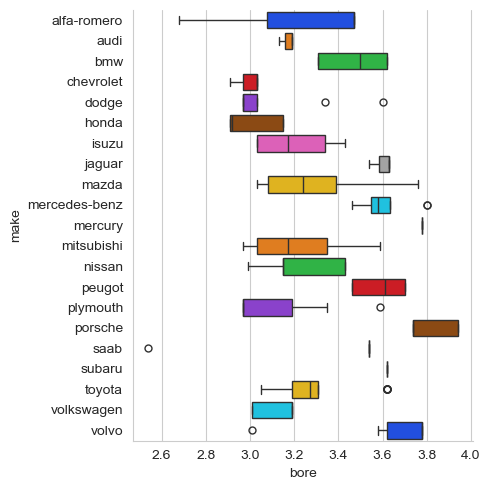

In [419]:
# category plot

sns.catplot(y = 'make', x = 'bore', kind = 'box', data = df, palette = 'bright')

<Axes: xlabel='normalized-losses', ylabel='Density'>

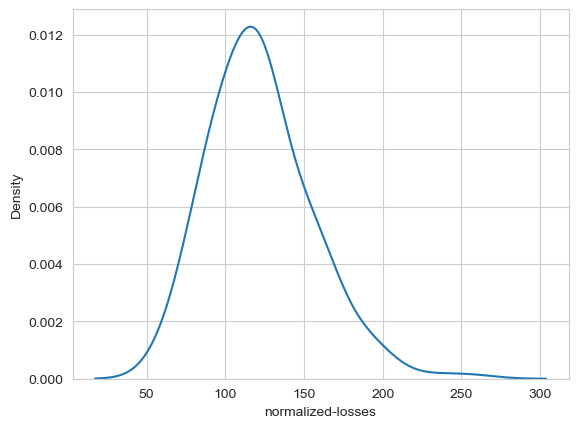

In [421]:
# kde plot to check distribution of 'normalized-losses'

sns.set_style('whitegrid')
sns.kdeplot(df['normalized-losses'], bw = 0.5, palette = 'bright')

In [423]:
# 'normalized-losses' median value

df['normalized-losses'].median()

122.0

In [425]:
# dropping irrelevant columns

df1 = df.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
              'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis = 1)

In [427]:
df1.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [429]:
corr_matrix = df1.corr()

<Axes: >

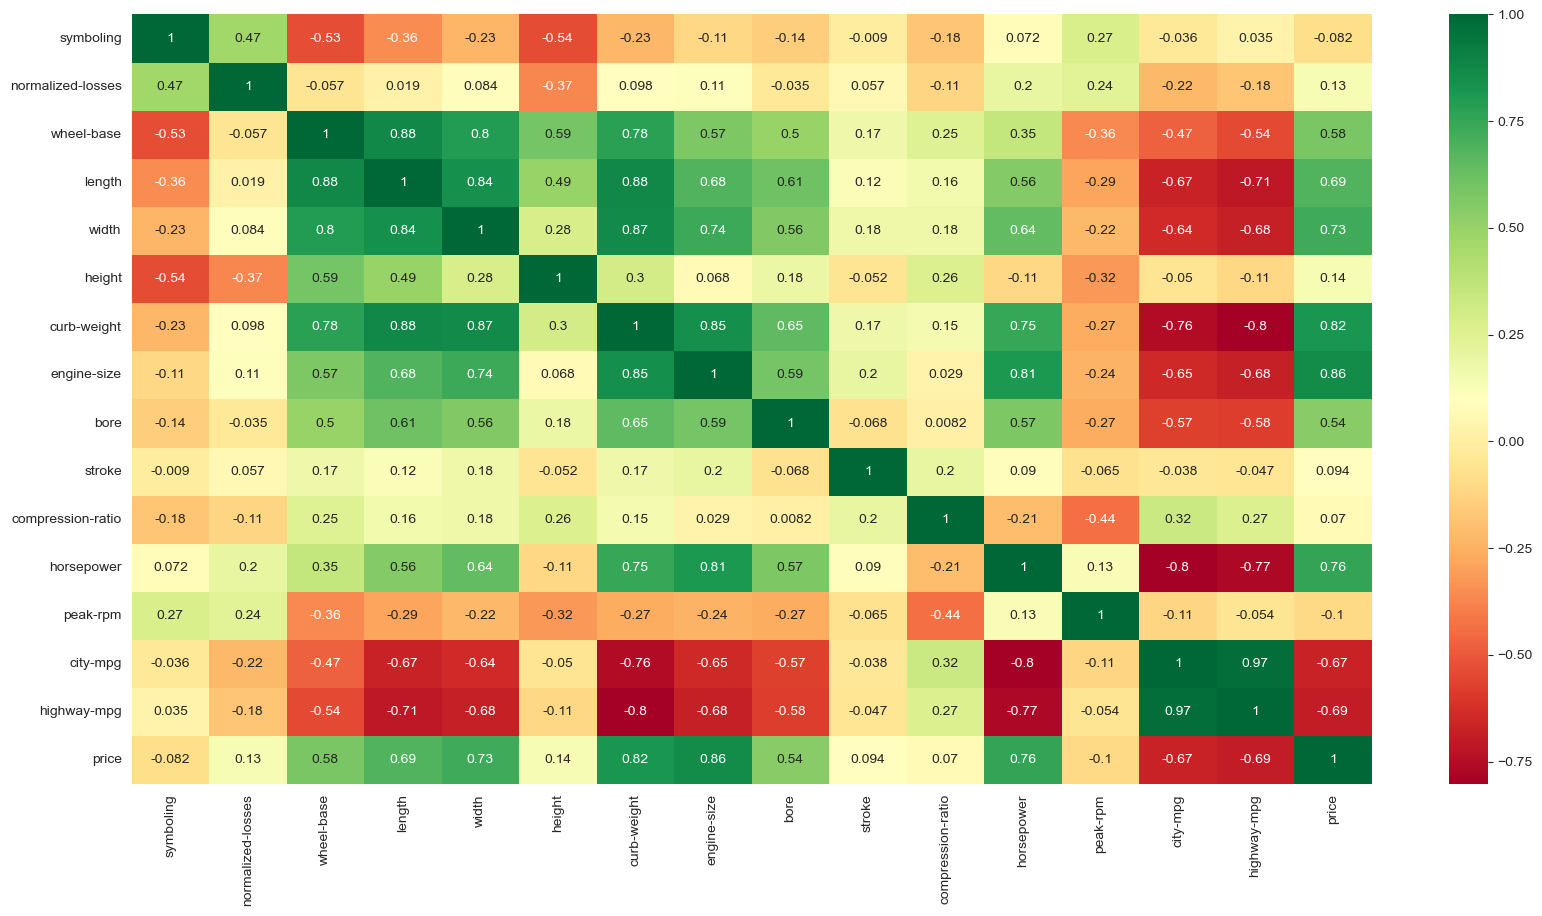

In [431]:
plt.figure(figsize = (20, 10))
sns.heatmap(data = corr_matrix, annot = True, cmap = 'RdYlGn')

In [432]:
corr_matrix = df1.corr()
# Find all pairs with correlation > 0.5
high_corr = corr_matrix[(corr_matrix > 0.5) & (corr_matrix < 1.0)]
print(high_corr)

                   symboling  normalized-losses  wheel-base    length  \
symboling                NaN                NaN         NaN       NaN   
normalized-losses        NaN                NaN         NaN       NaN   
wheel-base               NaN                NaN         NaN  0.878139   
length                   NaN                NaN    0.878139       NaN   
width                    NaN                NaN    0.797576  0.841173   
height                   NaN                NaN    0.591503       NaN   
curb-weight              NaN                NaN    0.776901  0.878776   
engine-size              NaN                NaN    0.570455  0.683610   
bore                     NaN                NaN         NaN  0.607831   
stroke                   NaN                NaN         NaN       NaN   
compression-ratio        NaN                NaN         NaN       NaN   
horsepower               NaN                NaN         NaN  0.555003   
peak-rpm                 NaN                NaN    

In [435]:
df1.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [437]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

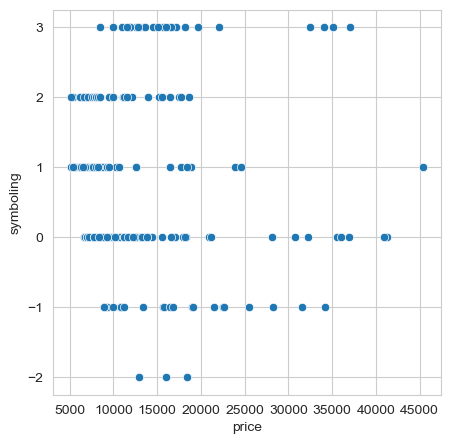

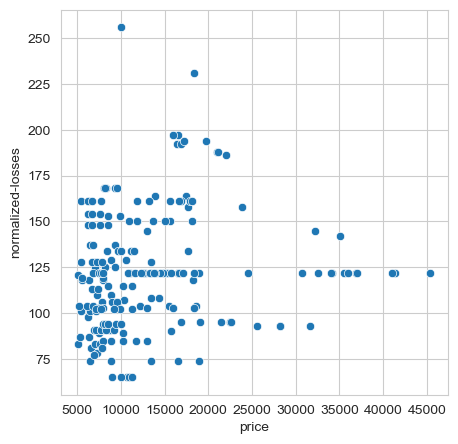

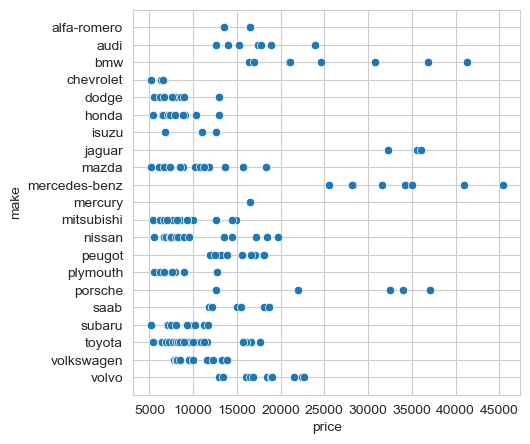

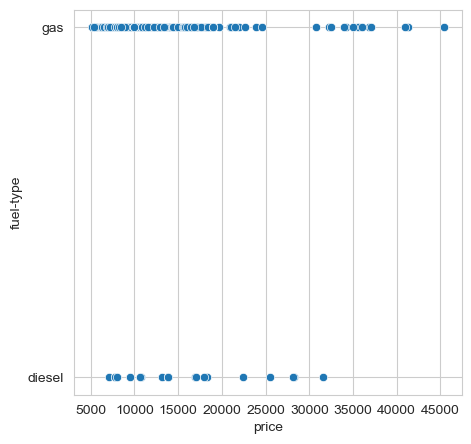

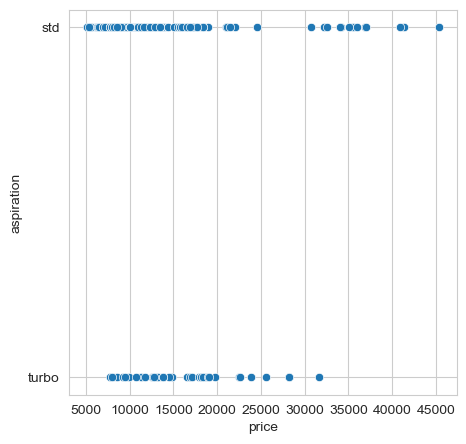

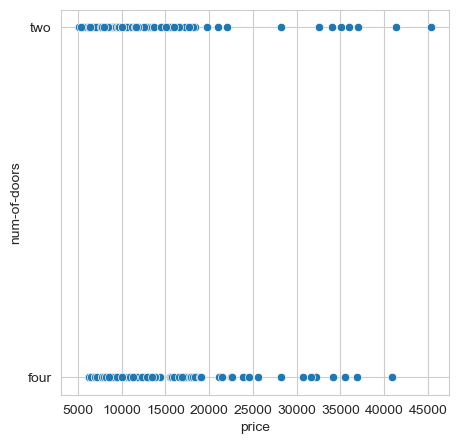

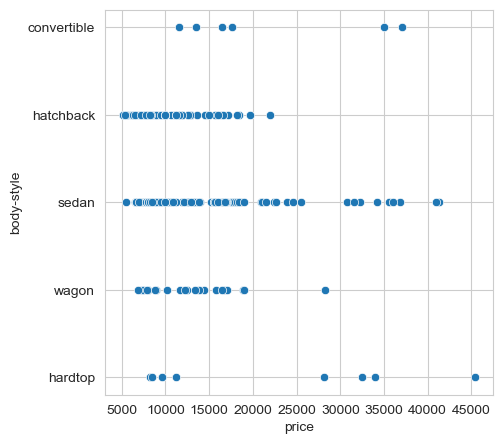

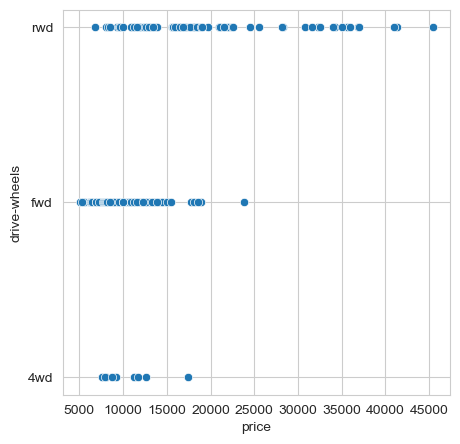

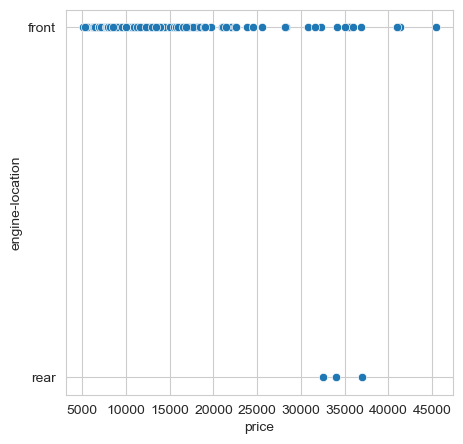

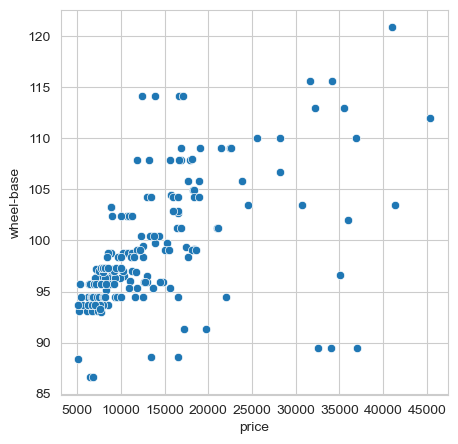

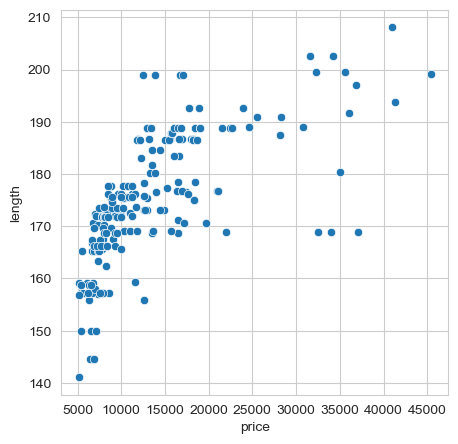

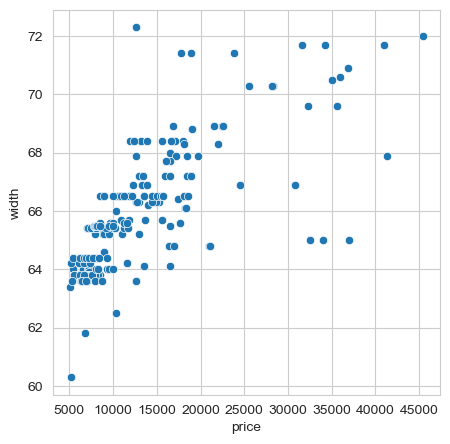

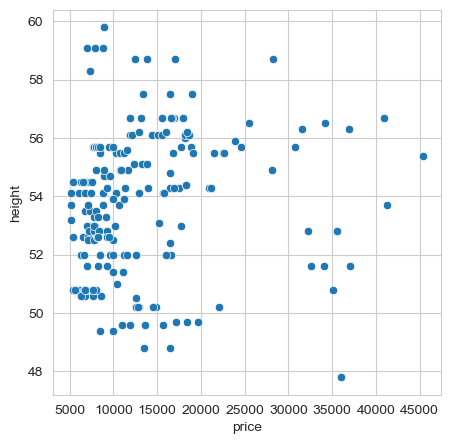

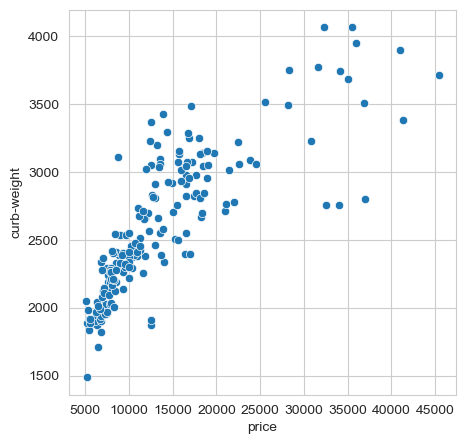

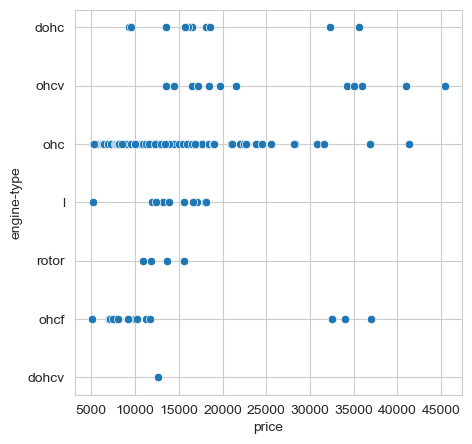

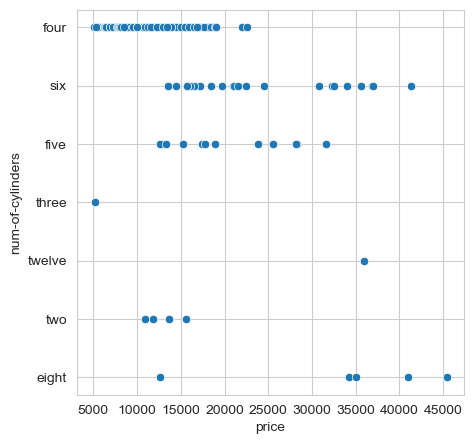

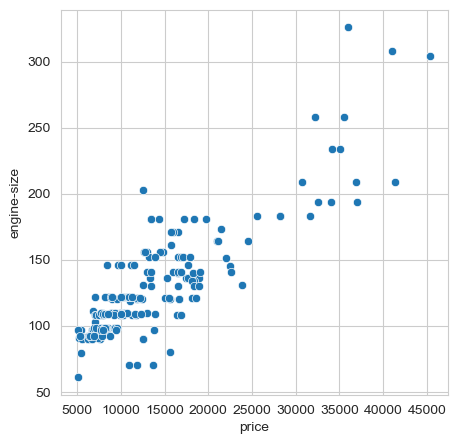

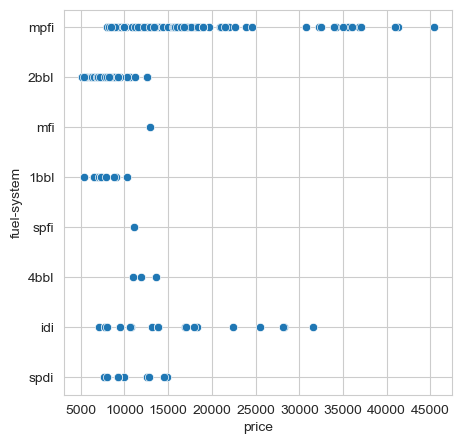

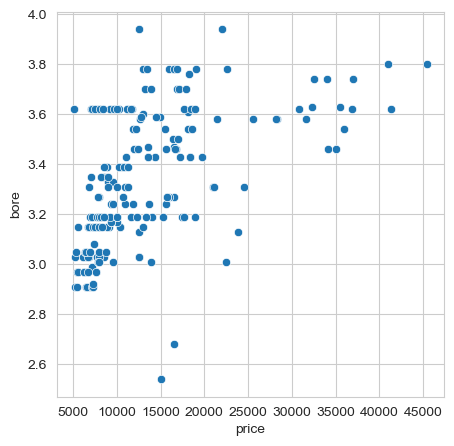

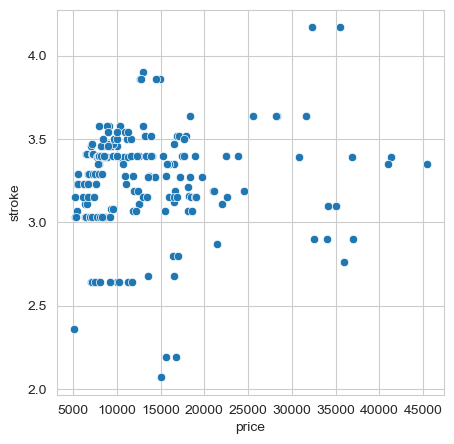

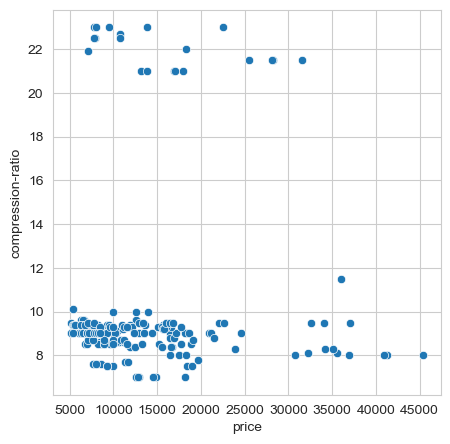

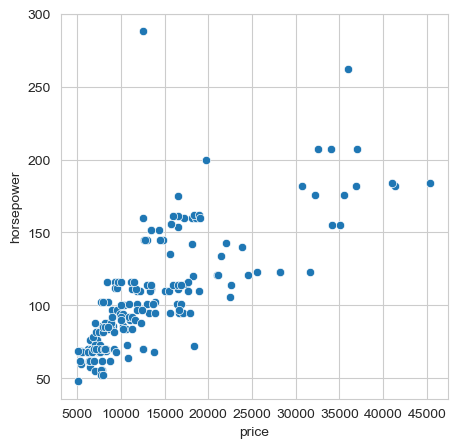

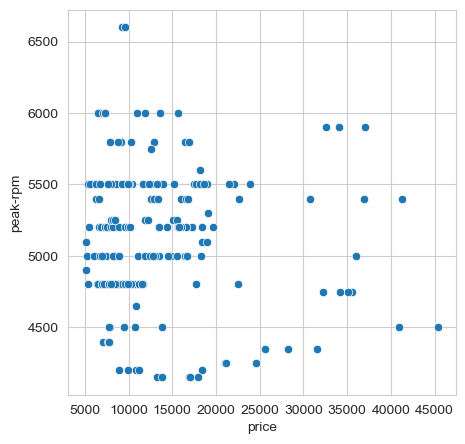

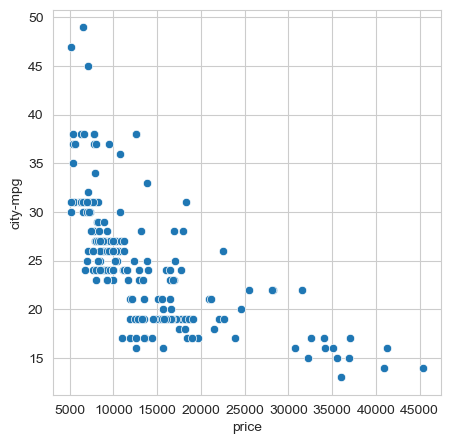

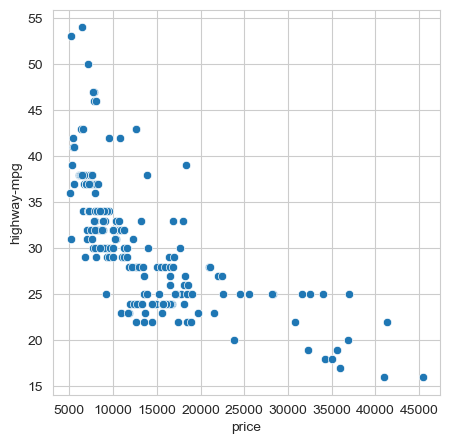

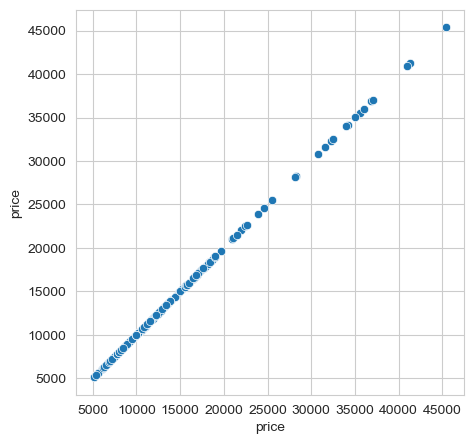

In [439]:
for column in df.columns:
    plt.figure(figsize = (5, 5))
    sns.scatterplot(data = df, x = 'price', y = column)
    plt.show()

In [440]:
categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors',
                        'body-style', 'drive-wheels', 'engine-location', 'engine-type',
                       'num-of-cylinders',
                       'fuel-system']

encoded_data = pd.get_dummies(df, columns = categorical_features)

In [441]:
encoded_data.shape

(203, 75)

In [442]:
X = encoded_data.drop('price', axis = 1)
y = encoded_data['price']

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 34)

In [449]:
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

### Linear Regression Model

In [452]:
model = LinearRegression()
model.fit(std_X_train, y_train)
print('train accuracy: ', model.score(std_X_train, y_train))
print('test accuracy: ', model.score(std_X_test, y_test))

train accuracy:  0.9664349032338365
test accuracy:  -3.884209901623942e+23


In [454]:
y_pred = model.predict(std_X_test)

Text(0, 0.5, 'Prediction')

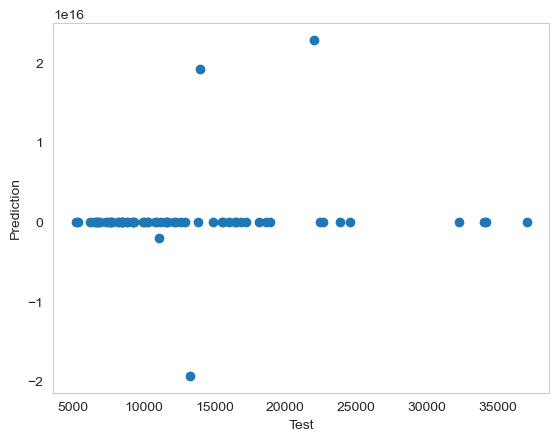

In [456]:
plt.scatter(y_test, y_pred)
plt.grid()
plt.xlabel('Test')
plt.ylabel('Prediction')

In [458]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  1038044961556397.6
Mean Squared Error:  2.079779501230264e+31
Root Mean Squared Error:  4560459956221811.0
R2 Score:  -3.884209901623942e+23


### Ridge Regression Model

In [461]:
ridgereg = Ridge()
ridgereg.fit(std_X_train, y_train)
print('train accuracy: ', ridgereg.score(std_X_train, y_train))
print('test accuracy: ', ridgereg.score(std_X_test, y_test))

train accuracy:  0.9655255386047454
test accuracy:  0.8430102238348393


Text(0, 0.5, 'Prediction')

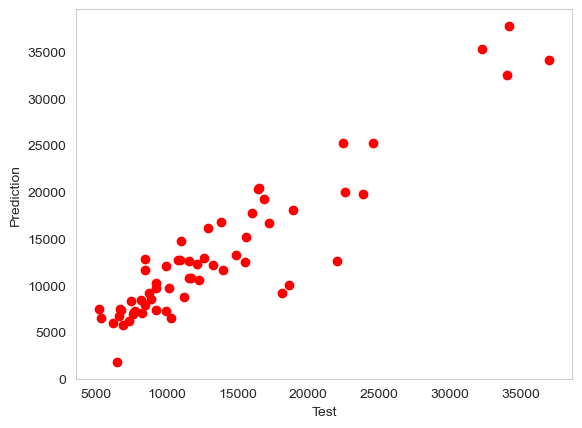

In [465]:
y_pred = ridgereg.predict(std_X_test)
plt.scatter(y_test, y_pred, color = 'red')
plt.grid()
plt.xlabel('Test')
plt.ylabel('Prediction')

In [467]:
print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: " , metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  2101.58664076935
Mean Squared Error:  8405933.938701956
Root Mean Squared Error:  2899.298870192922
R2 Score:  0.8430102238348393
